In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('wpbc.data')
data.head()

,119513,N,31,18.02,27.6,117.5,1013,0.09489,0.1036,0.1086,...,139.7,1436,0.1195,0.1926,0.314,0.117,0.2677,0.08113,5,5.1
0,8423,N,61,17.99,10.38,122.80,1001.0,0.11840,0.2776,0.3001,...,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,3.0,2
1,842517,N,116,21.37,17.44,137.50,1373.0,0.08836,0.1189,0.1255,...,159.10,1949.0,0.1188,0.3449,0.3414,0.2032,0.4334,0.09067,2.5,0
2,843483,N,123,11.42,20.38,77.58,386.1,0.14250,0.2839,0.2414,...,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,2.0,0
3,843584,R,27,20.29,14.34,135.10,1297.0,0.10030,0.1328,0.1980,...,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,3.5,0
4,843786,R,77,12.75,15.29,84.60,502.7,0.11890,0.1569,0.1664,...,107.30,733.2,0.1706,0.4196,0.5999,0.1709,0.3485,0.11790,2.5,0


In [3]:
pip install ucimlrepo

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



In [4]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
breast_cancer_wisconsin_original = fetch_ucirepo(id=15) 
  
# data (as pandas dataframes) 
X = breast_cancer_wisconsin_original.data.features 
y = breast_cancer_wisconsin_original.data.targets 
  
# metadata 
print(breast_cancer_wisconsin_original.metadata) 
  
# variable information 
print(breast_cancer_wisconsin_original.variables) 


{'uci_id': 15, 'name': 'Breast Cancer Wisconsin (Original)', 'repository_url': 'https://archive.ics.uci.edu/dataset/15/breast+cancer+wisconsin+original', 'data_url': 'https://archive.ics.uci.edu/static/public/15/data.csv', 'abstract': 'Original Wisconsin Breast Cancer Database', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 699, 'num_features': 9, 'feature_types': ['Integer'], 'demographics': [], 'target_col': ['Class'], 'index_col': ['Sample_code_number'], 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1990, 'last_updated': 'Sun Mar 10 2024', 'dataset_doi': '10.24432/C5HP4Z', 'creators': ['WIlliam Wolberg'], 'intro_paper': None, 'additional_info': {'summary': "Samples arrive periodically as Dr. Wolberg reports his clinical cases. The database therefore reflects this chronological grouping of the data. This grouping information appears immediately below, having been removed fro

In [5]:
X.shape

(699, 9)

In [6]:
X.head()

,Clump_thickness,Uniformity_of_cell_size,Uniformity_of_cell_shape,Marginal_adhesion,Single_epithelial_cell_size,Bare_nuclei,Bland_chromatin,Normal_nucleoli,Mitoses
0,5,1,1,1,2,1.0,3,1,1
1,5,4,4,5,7,10.0,3,2,1
2,3,1,1,1,2,2.0,3,1,1
3,6,8,8,1,3,4.0,3,7,1
4,4,1,1,3,2,1.0,3,1,1


In [7]:
X['Clump_thickness'].mean()

4.417739628040057

In [8]:
y.head()

,Class
0,2
1,2
2,2
3,2
4,2


In [9]:
y.describe

<bound method NDFrame.describe of      Class
0        2
1        2
2        2
3        2
4        2
..     ...
694      2
695      2
696      4
697      4
698      4

[699 rows x 1 columns]>

In [10]:
y.info

<bound method DataFrame.info of      Class
0        2
1        2
2        2
3        2
4        2
..     ...
694      2
695      2
696      4
697      4
698      4

[699 rows x 1 columns]>

In [11]:
y.shape

(699, 1)

In [12]:
df = X.copy()
df['Class'] = y
df.head()

,Clump_thickness,Uniformity_of_cell_size,Uniformity_of_cell_shape,Marginal_adhesion,Single_epithelial_cell_size,Bare_nuclei,Bland_chromatin,Normal_nucleoli,Mitoses,Class
0,5,1,1,1,2,1.0,3,1,1,2
1,5,4,4,5,7,10.0,3,2,1,2
2,3,1,1,1,2,2.0,3,1,1,2
3,6,8,8,1,3,4.0,3,7,1,2
4,4,1,1,3,2,1.0,3,1,1,2


In [13]:
df.describe()

,Clump_thickness,Uniformity_of_cell_size,Uniformity_of_cell_shape,Marginal_adhesion,Single_epithelial_cell_size,Bare_nuclei,Bland_chromatin,Normal_nucleoli,Mitoses,Class
count,699.000000,699.000000,699.000000,699.000000,699.000000,683.000000,699.000000,699.000000,699.000000,699.000000
mean,4.417740,3.134478,3.207439,2.806867,3.216023,3.544656,3.437768,2.866953,1.589413,2.689557
std,2.815741,3.051459,2.971913,2.855379,2.214300,3.643857,2.438364,3.053634,1.715078,0.951273
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000,4.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [14]:
IQR = df.quantile(0.75) - df.quantile(0.25)
IQR

Clump_thickness                4.0
Uniformity_of_cell_size        4.0
Uniformity_of_cell_shape       4.0
Marginal_adhesion              3.0
Single_epithelial_cell_size    2.0
Bare_nuclei                    5.0
Bland_chromatin                3.0
Normal_nucleoli                3.0
Mitoses                        0.0
Class                          2.0
dtype: float64

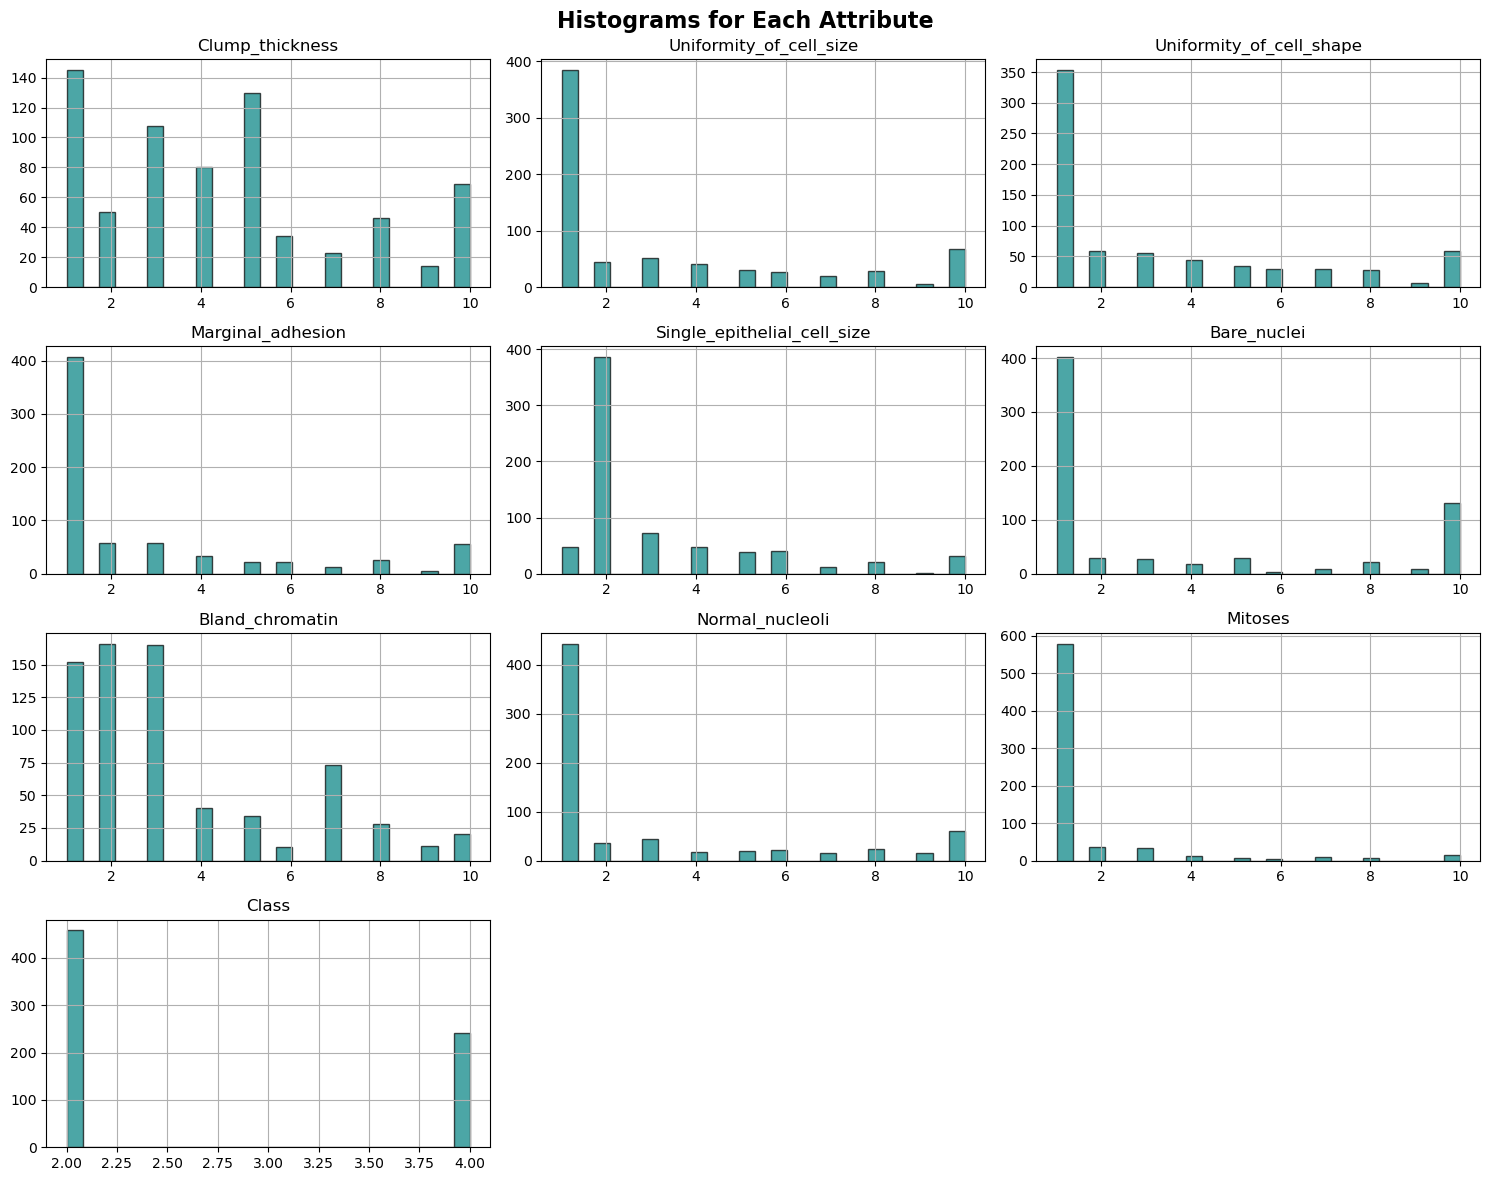

In [15]:
df.hist(figsize=(15, 12), bins=25, color='teal', alpha=0.7, edgecolor='black')
plt.suptitle('Histograms for Each Attribute', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

In [16]:
df['Class'].unique()

array([2, 4], dtype=int64)

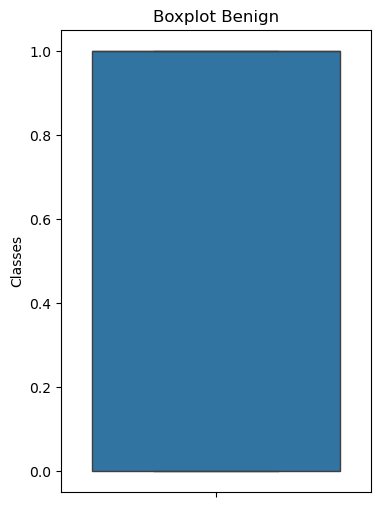

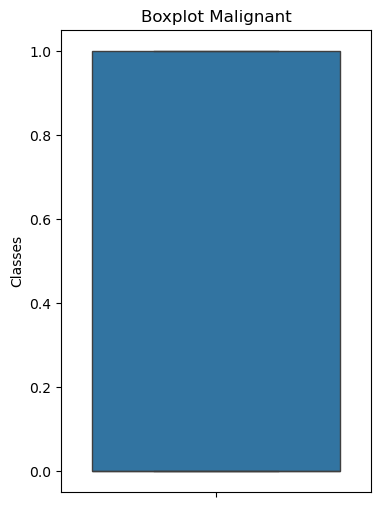

In [17]:
plt.figure(figsize=(4, 6))
sns.boxplot(df['Class']==2)
plt.title('Boxplot Benign')
plt.ylabel('Classes')

plt.figure(figsize=(4, 6))
sns.boxplot(df['Class']==4)
plt.title('Boxplot Malignant')
plt.ylabel('Classes')
plt.show()

plt.show()

In [18]:
df['Class'].describe()

count    699.000000
mean       2.689557
std        0.951273
min        2.000000
25%        2.000000
50%        2.000000
75%        4.000000
max        4.000000
Name: Class, dtype: float64

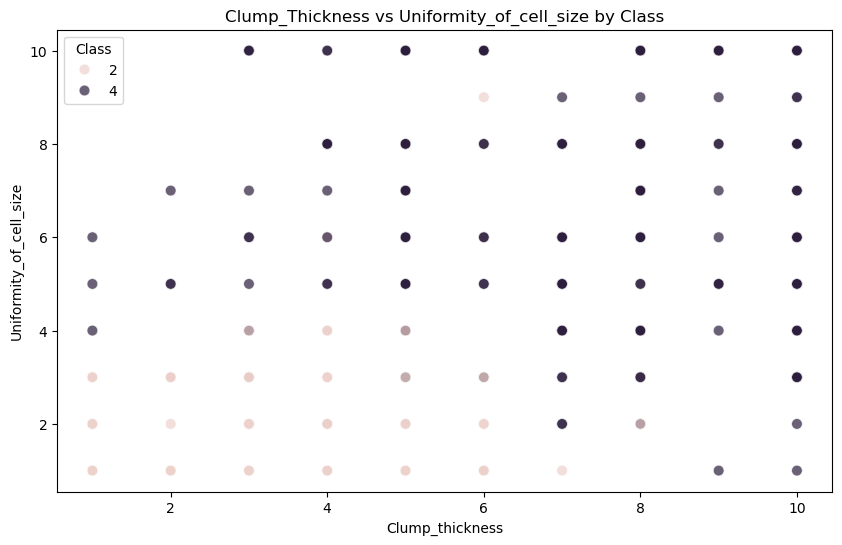

In [19]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Clump_thickness', y='Uniformity_of_cell_size', 
                hue='Class', 
                alpha=0.7, s=60)
plt.title('Clump_Thickness vs Uniformity_of_cell_size by Class')
plt.legend(title='Class')
plt.show()

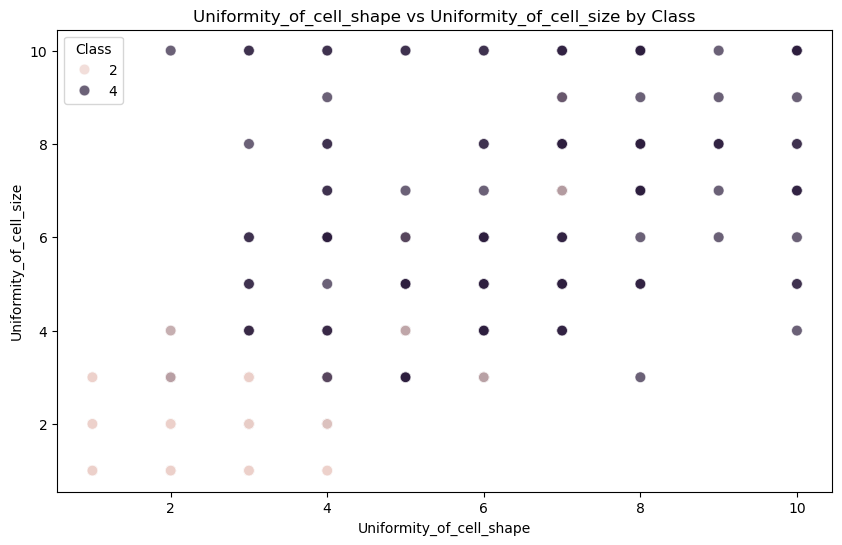

In [20]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Uniformity_of_cell_shape', y='Uniformity_of_cell_size', 
                hue='Class', 
                alpha=0.7, s=60)
plt.title('Uniformity_of_cell_shape vs Uniformity_of_cell_size by Class')
plt.legend(title='Class')
plt.show()

In [21]:
#Preprocessing

In [22]:
df.isnull().sum()

Clump_thickness                 0
Uniformity_of_cell_size         0
Uniformity_of_cell_shape        0
Marginal_adhesion               0
Single_epithelial_cell_size     0
Bare_nuclei                    16
Bland_chromatin                 0
Normal_nucleoli                 0
Mitoses                         0
Class                           0
dtype: int64

In [23]:
df['Bare_nuclei'].describe()

count    683.000000
mean       3.544656
std        3.643857
min        1.000000
25%        1.000000
50%        1.000000
75%        6.000000
max       10.000000
Name: Bare_nuclei, dtype: float64

In [45]:
df_clean = df['Bare_nuclei'].dropna()
X = X.dropna()

In [25]:
from sklearn.impute import SimpleImputer

imputer_mean = SimpleImputer(strategy='mean')
X_imputed_mean = pd.DataFrame(imputer_mean.fit_transform(df['Bare_nuclei'])

SyntaxError: incomplete input (2951585923.py, line 4)

In [ ]:
df_clean.isnull().sum()

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Min-Max scaling
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)

# Convert back to DataFrame
X_normalized_df = pd.DataFrame(X_normalized, columns=X.columns)

print("Original range:")
print(X.describe().loc[['min', 'max']])
print("\nAfter Min-Max scaling:")
print(pd.DataFrame(X_normalized, columns=X.columns).describe().loc[['min', 'max']])

In [ ]:
df_clean.shape

In [ ]:
X_normalized_df.head()

In [ ]:
X_normalized_df['Bare_nuclei'].isnull().sum()

In [ ]:
X_normalized_df['Bare_nuclei'].fillna(0)

In [ ]:
X_normalized_df['Bare_nuclei'].isnull().sum()

In [30]:
X_normalized_df['Bare_nuclei'] = X_normalized_df['Bare_nuclei'].fillna(X_normalized_df['Bare_nuclei'].mean())

In [ ]:
X_normalized_df['Bare_nuclei'].isnull().sum()

In [31]:
from sklearn.preprocessing import MinMaxScaler

# Min-Max scaling
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)

# Convert back to DataFrame
X_normalized_df = pd.DataFrame(X_normalized, columns=X.columns)

print("Original range:")
print(X.describe().loc[['min', 'max']])
print("\nAfter Min-Max scaling:")
print(pd.DataFrame(X_normalized, columns=X.columns).describe().loc[['min', 'max']])

Original range:
     Clump_thickness  Uniformity_of_cell_size  Uniformity_of_cell_shape  \
min              1.0                      1.0                       1.0   
max             10.0                     10.0                      10.0   

     Marginal_adhesion  Single_epithelial_cell_size  Bare_nuclei  \
min                1.0                          1.0          1.0   
max               10.0                         10.0         10.0   

     Bland_chromatin  Normal_nucleoli  Mitoses  
min              1.0              1.0      1.0  
max             10.0             10.0     10.0  

After Min-Max scaling:
     Clump_thickness  Uniformity_of_cell_size  Uniformity_of_cell_shape  \
min              0.0                      0.0                       0.0   
max              1.0                      1.0                       1.0   

     Marginal_adhesion  Single_epithelial_cell_size  Bare_nuclei  \
min                0.0                          0.0          0.0   
max                1

In [ ]:
X_normalized_df['Bare_nuclei'].isnull().sum()

In [ ]:
X_normalized_df['Bare_nuclei'].describe()

In [ ]:
X_normalized_df['Bare_nuclei'].head(30)

In [ ]:
#There are no categorical variables

In [ ]:
#Feature Engineering and Reduction
## Applying recursive feature elimination

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Initialize a base estimator
estimator = LogisticRegression(max_iter=1000, random_state=42)
# Alternatively: estimator = RandomForestClassifier(random_state=42)

# Apply RFE
rfe = RFE(estimator=estimator, n_features_to_select=10)  # Select top 10 features
rfe.fit(X_normalized_df, y.values.ravel())  # .ravel() to convert y to 1D array

# Get selected features
selected_features = X_normalized_df.columns[rfe.support_]
print("Selected features:", selected_features.tolist())
print("Number of features selected:", rfe.n_features_)

In [32]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Standardize the data first
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_normalized_df)

# Apply PCA
pca = PCA(n_components=0.95)  # Keep 95% of variance
X_pca = pca.fit_transform(X_scaled)

print(f"Original shape: {X_normalized_df.shape}")
print(f"PCA shape: {X_normalized_df.shape}")
print(f"Explained variance ratio: {pca.explained_variance_ratio_}")
print(f"Total variance explained: {pca.explained_variance_ratio_.sum():.3f}")

# Plot explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), 
         pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA Explained Variance')
plt.grid(True)
plt.show()

# Plot first two components
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y.iloc[:, 0].map({'M': 1, 'B': 0}), 
                     cmap='viridis', alpha=0.7)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA: First Two Components')
plt.colorbar(scatter, label='Diagnosis (M=1, B=0)')
plt.show()

ValueError: Input X contains NaN.
PCA does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [ ]:
from sklearn.manifold import TSNE

# Apply t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=30, max_iter=1000)
X_tsne = tsne.fit_transform(X_scaled)

print(f"t-SNE shape: {X_tsne.shape}")

# Plot t-SNE results
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], 
                     c=y.iloc[:, 0].map({'M': 1, 'B': 0}), 
                     cmap='coolwarm', alpha=0.7, s=50)
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('t-SNE Visualization (2D)')
plt.colorbar(scatter, label='Diagnosis (M=1, B=0)')
plt.show()

In [ ]:
!pip install umap-learn  # Install if not already installed
import umap.umap_ as umap

# Apply UMAP
umap_reducer = umap.UMAP(n_components=2, random_state=42, n_neighbors=15, min_dist=0.1)
X_umap = umap_reducer.fit_transform(X_scaled)

print(f"UMAP shape: {X_umap.shape}")

# Plot UMAP results
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_umap[:, 0], X_umap[:, 1], 
                     c=y.iloc[:, 0].map({'M': 1, 'B': 0}), 
                     cmap='Spectral', alpha=0.7, s=50)
plt.xlabel('UMAP Component 1')
plt.ylabel('UMAP Component 2')
plt.title('UMAP Visualization (2D)')
plt.colorbar(scatter, label='Diagnosis (M=1, B=0)')
plt.show()

In [ ]:
    pip install umap-learn

In [26]:
import umap as umap

# Apply UMAP
umap_reducer = umap.UMAP(n_components=2, random_state=42, n_neighbors=15, min_dist=0.1)
X_umap = umap_reducer.fit_transform(X_scaled)

print(f"UMAP shape: {X_umap.shape}")

# Plot UMAP results
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_umap[:, 0], X_umap[:, 1], 
                     c=y.iloc[:, 0].map({'M': 1, 'B': 0}), 
                     cmap='Spectral', alpha=0.7, s=50)
plt.xlabel('UMAP Component 1')
plt.ylabel('UMAP Component 2')
plt.title('UMAP Visualization (2D)')
plt.colorbar(scatter, label='Diagnosis (M=1, B=0)')
plt.show()

NameError: name 'X_scaled' is not defined

In [33]:
#Second EDA Post Processing

In [34]:
from mpl_toolkits.mplot3d import Axes3D

# PCA 3D
pca_3d = PCA(n_components=3)
X_pca_3d = pca_3d.fit_transform(X_scaled)

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_pca_3d[:, 0], X_pca_3d[:, 1], X_pca_3d[:, 2],
                    c=y.iloc[:, 0].map({'M': 1, 'B': 0}), 
                    cmap='viridis', alpha=0.7, s=40)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('PCA 3D Visualization')
plt.colorbar(scatter, label='Diagnosis (M=1, B=0)')
plt.show()

ValueError: Input X contains NaN.
PCA does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

NameError: name 'X_pca' is not defined

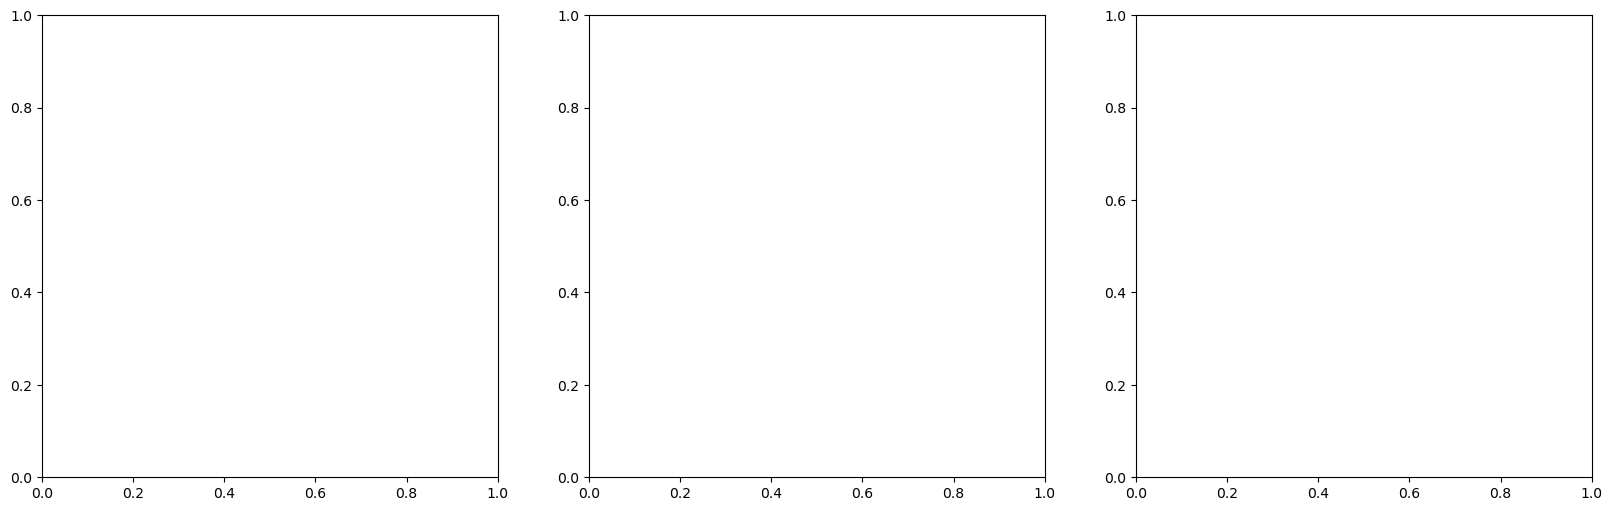

In [35]:
# Create subplots to compare all three methods
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# PCA
scatter1 = axes[0].scatter(X_pca[:, 0], X_pca[:, 1], 
                          c=y.iloc[:, 0].map({'M': 1, 'B': 0}), 
                          cmap='viridis', alpha=0.7, s=40)
axes[0].set_title('PCA')
axes[0].set_xlabel('PC1')
axes[0].set_ylabel('PC2')

# t-SNE
scatter2 = axes[1].scatter(X_tsne[:, 0], X_tsne[:, 1], 
                          c=y.iloc[:, 0].map({'M': 1, 'B': 0}), 
                          cmap='coolwarm', alpha=0.7, s=40)
axes[1].set_title('t-SNE')
axes[1].set_xlabel('Component 1')
axes[1].set_ylabel('Component 2')

# UMAP
scatter3 = axes[2].scatter(X_umap[:, 0], X_umap[:, 1], 
                          c=y.iloc[:, 0].map({'M': 1, 'B': 0}), 
                          cmap='Spectral', alpha=0.7, s=40)
axes[2].set_title('UMAP')
axes[2].set_xlabel('Component 1')
axes[2].set_ylabel('Component 2')

plt.tight_layout()
plt.show()

In [36]:
# Compare variance preservation
print("Variance Analysis:")
print(f"PCA explained variance: {pca.explained_variance_ratio_.sum():.3%}")

# For t-SNE and UMAP, we can measure cluster separation
from sklearn.metrics import silhouette_score

# Calculate silhouette scores (higher = better separation)
silhouette_pca = silhouette_score(X_pca, y.iloc[:, 0])
silhouette_tsne = silhouette_score(X_tsne, y.iloc[:, 0])
silhouette_umap = silhouette_score(X_umap, y.iloc[:, 0])

print(f"Silhouette Score - PCA: {silhouette_pca:.3f}")
print(f"Silhouette Score - t-SNE: {silhouette_tsne:.3f}")
print(f"Silhouette Score - UMAP: {silhouette_umap:.3f}")

Variance Analysis:


AttributeError: 'PCA' object has no attribute 'explained_variance_ratio_'

In [37]:
#Feature Importance Visualization from Decision Tree

In [38]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Decision Tree
dt = DecisionTreeClassifier(random_state=42, max_depth=5)
dt.fit(X_train, y_train)

# Get feature importance
feature_importance = dt.feature_importances_
feature_names = X.columns

# Create a DataFrame for easier handling
importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': feature_importance
}).sort_values('importance', ascending=False)

print("Top 10 most important features:")
print(importance_df.head(10))

Top 10 most important features:
                       feature  importance
2     Uniformity_of_cell_shape    0.741954
5                  Bare_nuclei    0.132800
7              Normal_nucleoli    0.045463
0              Clump_thickness    0.041728
3            Marginal_adhesion    0.017999
4  Single_epithelial_cell_size    0.010080
8                      Mitoses    0.006156
6              Bland_chromatin    0.003819
1      Uniformity_of_cell_size    0.000000


In [39]:
#ML Modeling

In [40]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Top features from your decision tree
top_features = [
    'Uniformity_of_cell_shape',
    'Bare_nuclei', 
    'Normal_nucleoli',
    'Clump_thickness',
    'Marginal_adhesion',
    'Single_epithelial_cell_size',
    'Mitoses',
    'Bland_chromatin'
    # Note: 'Uniformity_of_cell_size' has 0 importance, so we exclude it
]

# Create new dataset with only top features
X_top = X[top_features]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_top, y, test_size=0.2, random_state=42, stratify=y)

print(f"Original shape: {X.shape}")
print(f"Reduced shape: {X_top.shape}")
print(f"Features used: {list(X_top.columns)}")


Original shape: (699, 9)
Reduced shape: (699, 8)
Features used: ['Uniformity_of_cell_shape', 'Bare_nuclei', 'Normal_nucleoli', 'Clump_thickness', 'Marginal_adhesion', 'Single_epithelial_cell_size', 'Mitoses', 'Bland_chromatin']


In [46]:
# Initialize and train Gaussian Naive Bayes
nb_model = GaussianNB()
nb_model.fit(X_train, y_train.values.ravel())

# Make predictions
y_pred = nb_model.predict(X_test)
y_pred_proba = nb_model.predict_proba(X_test)

print("Naive Bayes model trained successfully!")

ValueError: Input X contains NaN.
GaussianNB does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [47]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label='M')  # Assuming 'M' is positive class
recall = recall_score(y_test, y_pred, pos_label='M')
f1 = f1_score(y_test, y_pred, pos_label='M')

print("=== Model Performance ===")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)

NameError: name 'y_pred' is not defined

In [48]:
print("\n=== Detailed Classification Report ===")
print(classification_report(y_test, y_pred, target_names=['Benign', 'Malignant']))

# Probability estimates for first few test samples
print("\nProbability estimates for first 5 test samples:")
for i in range(5):
    print(f"Sample {i+1}: Benign={y_pred_proba[i][0]:.3f}, Malignant={y_pred_proba[i][1]:.3f}")


=== Detailed Classification Report ===


NameError: name 'y_pred' is not defined

In [49]:
# While Naive Bayes doesn't have inherent feature importance, we can use coefficients
plt.figure(figsize=(12, 6))
theta = nb_model.theta_  # Mean of each feature per class
sigma = nb_model.sigma_  # Variance of each feature per class

# Plot class separation (difference in means relative to variance)
class_separation = np.abs(theta[0] - theta[1]) / np.sqrt(sigma[0] + sigma[1])
feature_importance_nb = pd.DataFrame({
    'feature': top_features,
    'importance': class_separation
}).sort_values('importance', ascending=False)

plt.barh(feature_importance_nb['feature'], feature_importance_nb['importance'], color='lightgreen')
plt.xlabel('Class Separation (|μ₁-μ₂|/√(σ₁²+σ₂²))')
plt.ylabel('Features')
plt.title('Naive Bayes: Feature Importance based on Class Separation')
plt.gca().invert_yaxis()
plt.grid(axis='x', alpha=0.3)
plt.show()

AttributeError: 'GaussianNB' object has no attribute 'theta_'

<Figure size 1200x600 with 0 Axes>

In [50]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Use the same top features as before
top_features = [
    'Uniformity_of_cell_shape',
    'Bare_nuclei', 
    'Normal_nucleoli',
    'Clump_thickness',
    'Marginal_adhesion',
    'Single_epithelial_cell_size',
    'Mitoses',
    'Bland_chromatin'
]

X_top = X[top_features]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_top, y, test_size=0.2, random_state=42, stratify=y)

# Scale the data (important for KNN!)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Data prepared: {X_train_scaled.shape} training samples, {X_test_scaled.shape} test samples")

ValueError: Found input variables with inconsistent numbers of samples: [683, 699]

In [51]:
# Train initial KNN model
knn_basic = KNeighborsClassifier(n_neighbors=5)
knn_basic.fit(X_train_scaled, y_train.values.ravel())

# Predictions
y_pred_basic = knn_basic.predict(X_test_scaled)

# Evaluate
accuracy_basic = accuracy_score(y_test, y_pred_basic)
print(f"Basic KNN (k=5) Accuracy: {accuracy_basic:.4f}")

NameError: name 'X_train_scaled' is not defined

In [52]:
#Evaluation: Accuracy, Sensitivity/Specificity, ROC-AUC, Calibration curves for probabilistic models.

In [53]:
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score, 
                            confusion_matrix, classification_report, roc_curve, auc, 
                            roc_auc_score, precision_recall_curve, average_precision_score)
from sklearn.calibration import calibration_curve
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [54]:
# Naive Bayes predictions and probabilities
y_pred_nb = nb_model.predict(X_test)
y_pred_proba_nb = nb_model.predict_proba(X_test)[:, 1]  # Probability for positive class (Malignant)

# Convert y_test to binary (assuming 'M' is positive, 'B' is negative)
y_test_binary = (y_test.iloc[:, 0] == 'M').astype(int)

print("=== NAIVE BAYES EVALUATION ===")
print("=" * 50)

ValueError: Input X contains NaN.
GaussianNB does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [55]:
# KNN predictions and probabilities
y_pred_knn = knn_optimized.predict(X_test_scaled)
y_pred_proba_knn = knn_optimized.predict_proba(X_test_scaled)[:, 1]  # Probability for positive class

print("=== KNN EVALUATION ===")
print("=" * 50)

NameError: name 'knn_optimized' is not defined

In [56]:
def calculate_metrics(y_true, y_pred, y_proba, model_name):
    # Basic metrics
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    roc_auc = roc_auc_score(y_true, y_proba)
    
    # Sensitivity (Recall) and Specificity
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    sensitivity = tp / (tp + fn)  # Recall
    specificity = tn / (tn + fp)
    
    # Precision-Recall AUC
    precision_vals, recall_vals, _ = precision_recall_curve(y_true, y_proba)
    pr_auc = auc(recall_vals, precision_vals)
    avg_precision = average_precision_score(y_true, y_proba)
    
    return {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'sensitivity': sensitivity,
        'specificity': specificity,
        'roc_auc': roc_auc,
        'pr_auc': pr_auc,
        'avg_precision': avg_precision
    }

# Calculate metrics for both models
nb_metrics = calculate_metrics(y_test_binary, y_pred_nb, y_pred_proba_nb, "Naive Bayes")
knn_metrics = calculate_metrics(y_test_binary, y_pred_knn, y_pred_proba_knn, "KNN")

# Create comparison dataframe
metrics_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall/Sensitivity', 'Specificity', 
               'F1-Score', 'ROC-AUC', 'PR-AUC', 'Average Precision'],
    'Naive_Bayes': [nb_metrics['accuracy'], nb_metrics['precision'], 
                   nb_metrics['sensitivity'], nb_metrics['specificity'],
                   nb_metrics['f1'], nb_metrics['roc_auc'], 
                   nb_metrics['pr_auc'], nb_metrics['avg_precision']],
    'KNN': [knn_metrics['accuracy'], knn_metrics['precision'],
           knn_metrics['sensitivity'], knn_metrics['specificity'],
           knn_metrics['f1'], knn_metrics['roc_auc'],
           knn_metrics['pr_auc'], knn_metrics['avg_precision']]
})

print("COMPREHENSIVE MODEL COMPARISON:")
print(metrics_df.round(4))

NameError: name 'y_test_binary' is not defined

In [57]:
# Calculate ROC curves
fpr_nb, tpr_nb, _ = roc_curve(y_test_binary, y_pred_proba_nb)
fpr_knn, tpr_knn, _ = roc_curve(y_test_binary, y_pred_proba_knn)

# Plot ROC curves
plt.figure(figsize=(10, 8))
plt.plot(fpr_nb, tpr_nb, label=f'Naive Bayes (AUC = {nb_metrics["roc_auc"]:.3f})', linewidth=2)
plt.plot(fpr_knn, tpr_knn, label=f'KNN (AUC = {knn_metrics["roc_auc"]:.3f})', linewidth=2)
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('ROC Curves - Model Comparison')
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.show()

NameError: name 'y_test_binary' is not defined

In [58]:
# Calculate Precision-Recall curves
precision_nb, recall_nb, _ = precision_recall_curve(y_test_binary, y_pred_proba_nb)
precision_knn, recall_knn, _ = precision_recall_curve(y_test_binary, y_pred_proba_knn)

# Plot Precision-Recall curves
plt.figure(figsize=(10, 8))
plt.plot(recall_nb, precision_nb, label=f'Naive Bayes (AP = {nb_metrics["avg_precision"]:.3f})', linewidth=2)
plt.plot(recall_knn, precision_knn, label=f'KNN (AP = {knn_metrics["avg_precision"]:.3f})', linewidth=2)
plt.xlabel('Recall (Sensitivity)')
plt.ylabel('Precision')
plt.title('Precision-Recall Curves - Model Comparison')
plt.legend(loc='upper right')
plt.grid(alpha=0.3)
plt.show()

NameError: name 'y_test_binary' is not defined

In [59]:
# Calculate calibration curves
prob_true_nb, prob_pred_nb = calibration_curve(y_test_binary, y_pred_proba_nb, n_bins=10)
prob_true_knn, prob_pred_knn = calibration_curve(y_test_binary, y_pred_proba_knn, n_bins=10)

# Plot calibration curves
plt.figure(figsize=(10, 8))
plt.plot(prob_pred_nb, prob_true_nb, 's-', label='Naive Bayes', linewidth=2)
plt.plot(prob_pred_knn, prob_true_knn, 's-', label='KNN', linewidth=2)
plt.plot([0, 1], [0, 1], 'k--', label='Perfectly Calibrated')
plt.xlabel('Mean Predicted Probability')
plt.ylabel('Fraction of Positives')
plt.title('Calibration Curves - Model Comparison')
plt.legend(loc='upper left')
plt.grid(alpha=0.3)
plt.show()

# Calculate Brier Score (calibration metric)
from sklearn.metrics import brier_score_loss
brier_nb = brier_score_loss(y_test_binary, y_pred_proba_nb)
brier_knn = brier_score_loss(y_test_binary, y_pred_proba_knn)

print(f"\nBrier Score (lower is better):")
print(f"Naive Bayes: {brier_nb:.4f}")
print(f"KNN: {brier_knn:.4f}")

NameError: name 'y_test_binary' is not defined

In [60]:
# Confusion matrices
cm_nb = confusion_matrix(y_test_binary, y_pred_nb)
cm_knn = confusion_matrix(y_test_binary, y_pred_knn)

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Naive Bayes confusion matrix
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Blues', ax=axes[0],
            xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
axes[0].set_title('Naive Bayes Confusion Matrix')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

# KNN confusion matrix
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Reds', ax=axes[1],
            xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
axes[1].set_title('KNN Confusion Matrix')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')

plt.tight_layout()
plt.show()

# Print confusion matrix details
print("NAIVE BAYES CONFUSION MATRIX:")
print(f"True Negatives: {cm_nb[0,0]}")
print(f"False Positives: {cm_nb[0,1]}")
print(f"False Negatives: {cm_nb[1,0]}")
print(f"True Positives: {cm_nb[1,1]}")

print("\nKNN CONFUSION MATRIX:")
print(f"True Negatives: {cm_knn[0,0]}")
print(f"False Positives: {cm_knn[0,1]}")
print(f"False Negatives: {cm_knn[1,0]}")
print(f"True Positives: {cm_knn[1,1]}")

NameError: name 'y_test_binary' is not defined

NameError: name 'y_pred_proba_nb' is not defined

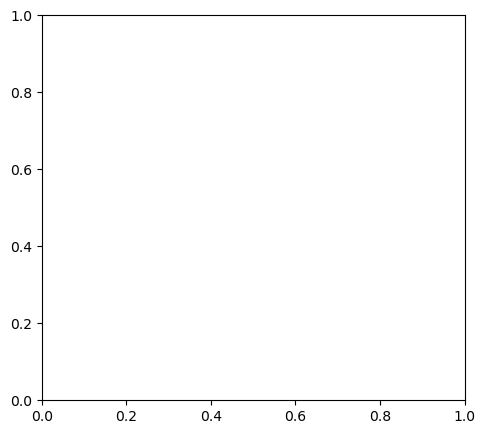

In [61]:
# Plot probability distributions
plt.figure(figsize=(12, 5))

# Naive Bayes probabilities
plt.subplot(1, 2, 1)
plt.hist(y_pred_proba_nb[y_test_binary == 0], alpha=0.5, label='Benign', bins=20, color='green')
plt.hist(y_pred_proba_nb[y_test_binary == 1], alpha=0.5, label='Malignant', bins=20, color='red')
plt.xlabel('Predicted Probability')
plt.ylabel('Frequency')
plt.title('Naive Bayes: Probability Distribution')
plt.legend()

# KNN probabilities
plt.subplot(1, 2, 2)
plt.hist(y_pred_proba_knn[y_test_binary == 0], alpha=0.5, label='Benign', bins=20, color='green')
plt.hist(y_pred_proba_knn[y_test_binary == 1], alpha=0.5, label='Malignant', bins=20, color='red')
plt.xlabel('Predicted Probability')
plt.ylabel('Frequency')
plt.title('KNN: Probability Distribution')
plt.legend()

plt.tight_layout()
plt.show()

In [62]:
#Interpretation

In [66]:
#What features best separate benign/malignant?
#Given Top 10 most important features, these features above 5% would best separate benign/malignant:
#                       feature  importance
#2     Uniformity_of_cell_shape    0.741954
#5                  Bare_nuclei    0.132800
#7              Normal_nucleoli    0.045463
#0              Clump_thickness    0.041728


In [67]:
#Implications of false negatives in healthcare.
#A false negative means we reject or do not detect a malignant and this means there is greater risk of patients going undetected, while they have a malignant
#In this case, we would rather have false positives happening more than false negatives